# Predict whether a customer of a telecom operator will terminate the contract


In [2]:
####
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%pwd

'C:\\Users\\garfi\\anaconda3\\Datasets\\Datasets-20250321'

In [3]:
####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Ler dados

In [5]:
####
df=pd.read_csv('TelecomChurn.csv')


### Variable Breakdown

- STATE: 51 Unique States in United States of America
- Account Length. Length of The Account
- Area Code 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland
- International Plan Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan
- Voice Mail Plan Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan
- Number vmail messages Number of Voice Mail Messages ranging from 0 to 50
- Total day minutes Total Number of Minutes Spent By Customers in Morning
- Total day calls Total Number of Calls made by Customer in Morning.
- Total day charge Total Charge to the Customers in Morning.
- Total eve minutesTotal Number of Minutes Spent By Customers in Evening
- Total eve calls Total Number of Calls made by Customer in Evening.
- Total eve charge Total Charge to the Customers in Morning.
- Total night minutes Total Number of Minutes Spent By Customers in the Night.
- Total night calls Total Number of Calls made by Customer in Night.
- Total night charge Total Charge to the Customers in Night.


In [7]:
# A first look into the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# let's check for column names, nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### ==> there are no missing values in the dataset
### ==> ['state', 'international plan', 'voice mail plan'] need to be encoded
### ==> 'churn' can be encoded
###

In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.describe(exclude=np.number)

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


### ==> phone number can be deleted. There is no added value from it as all values are distinct
### ==> most customers don't have neither international nor voice mail plans
### ==> most customers don't quit their contracts (churn=False)
### ==> this is an UNBALANCED dataset
###

In [13]:
# confirming that all 3333 phone number values are distinct 
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [14]:
# Any null values?
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [15]:
# List all the columns. We may need them later
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [16]:
# checking the state values
np.unique(df.state)

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

<Axes: >

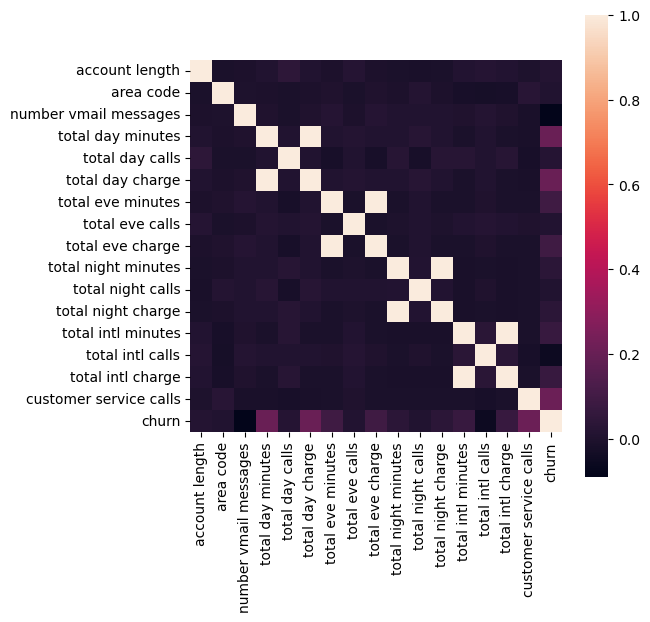

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True),square=True)

## What can we conclude from this?


## Very strong correlation between day charge and total day minutes (/eve/night/intl)
## ==> Drop ['total day charge','total eve charge', 'total night charge', 'total intl charge']

In [20]:
# skiping this as it is heavy on the cpu
#sns.pairplot(df)

In [21]:
# Churn, the target of our model, is boolean. Lets check its values

churnCount = df["churn"].value_counts()
churnCount

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn'>

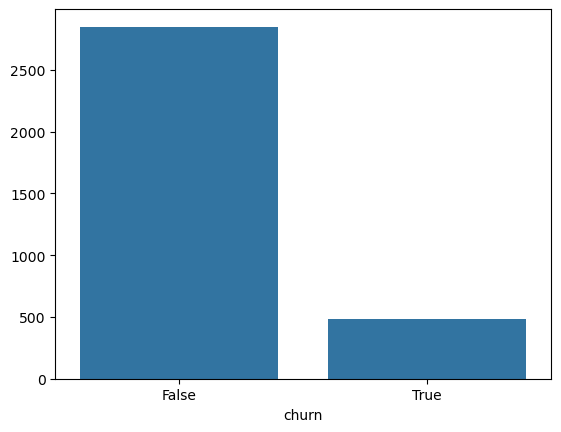

In [22]:
sns.barplot(x=churnCount.index, y=churnCount.values)

In [23]:
churnCount[True]/df['churn'].count()

0.14491449144914492

## What can we conclude from this?


## ==> Conclusion: unbalanced data. Only 14.5% of customers dropped out

In [26]:
churns=df[df.churn==1]
#churns['total day calls'].hist(),
#churns['total night calls'].hist(),
#churns['total eve calls'].hist()

noChurns=df[df.churn==0]
#noChurns['total day calls'].hist(),
#noChurns['total night calls'].hist(),
#noChurns['total eve calls'].hist()

Text(0.5, 1.0, 'No Churns')

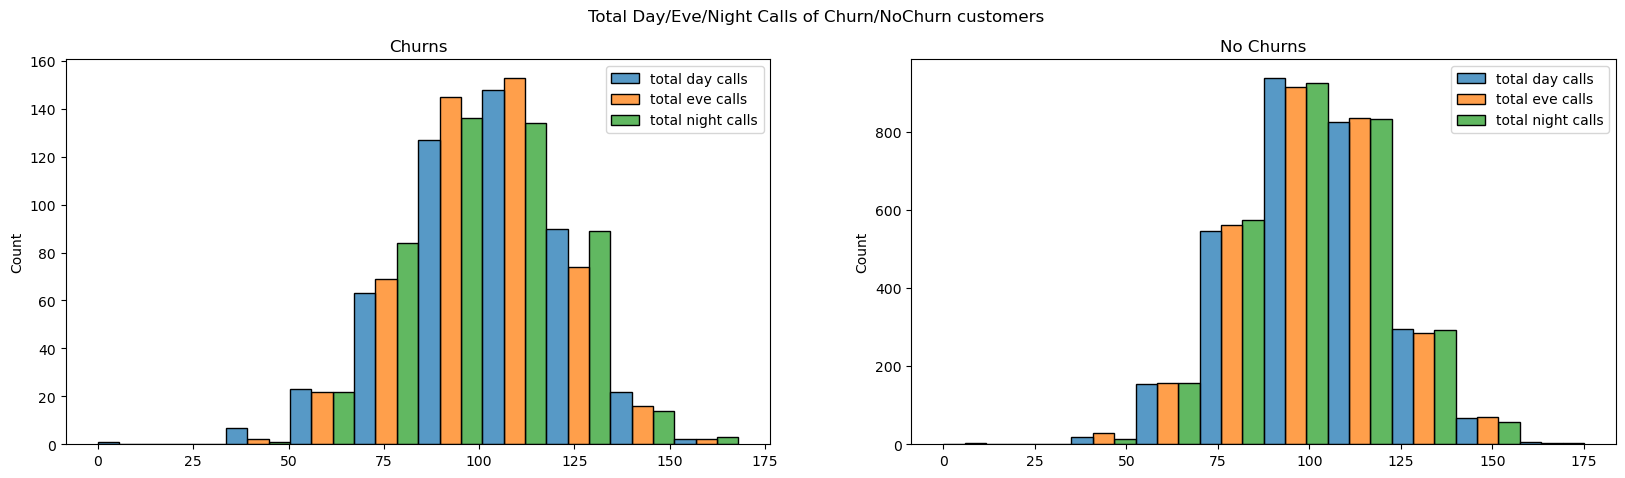

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Total Day/Eve/Night Calls of Churn/NoChurn customers')

sns.histplot(ax=axes[0], data = churns[['total day calls', 'total eve calls', 'total night calls']], multiple='dodge', bins=10)
axes[0].set_title('Churns')

sns.histplot(ax=axes[1], data = noChurns[['total day calls', 'total eve calls', 'total night calls']], multiple='dodge', bins=10)
axes[1].set_title('No Churns')

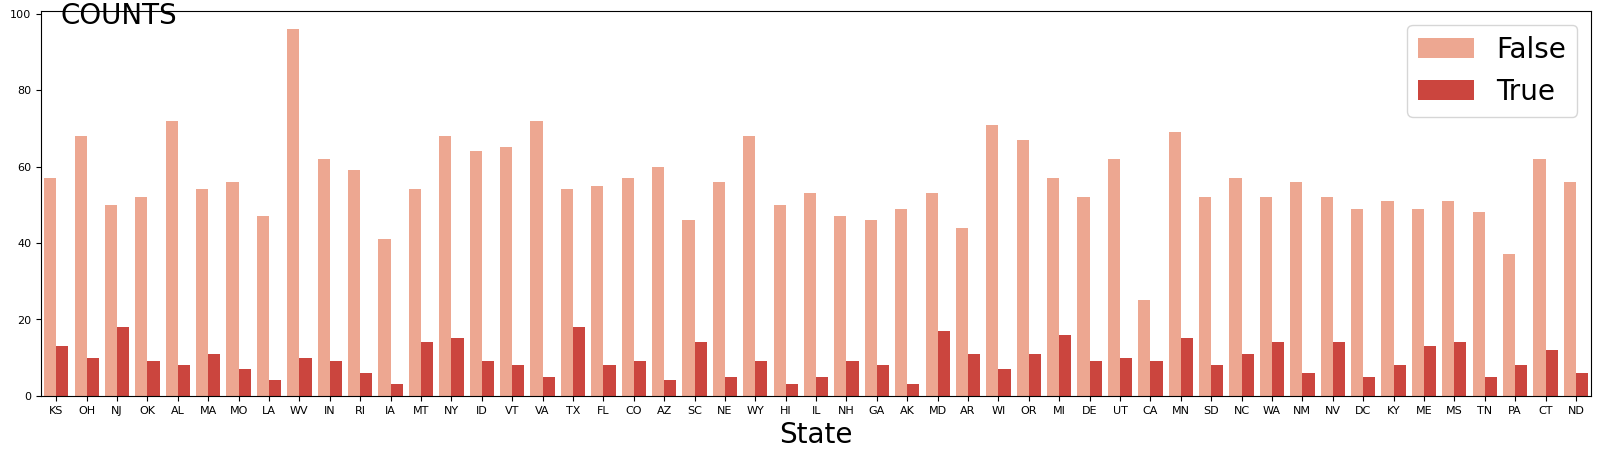

In [28]:
# Churn counting per state

fig, axz = plt.subplots(figsize=(20,5))

axz = sns.countplot(x='state', hue='churn', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=8) 

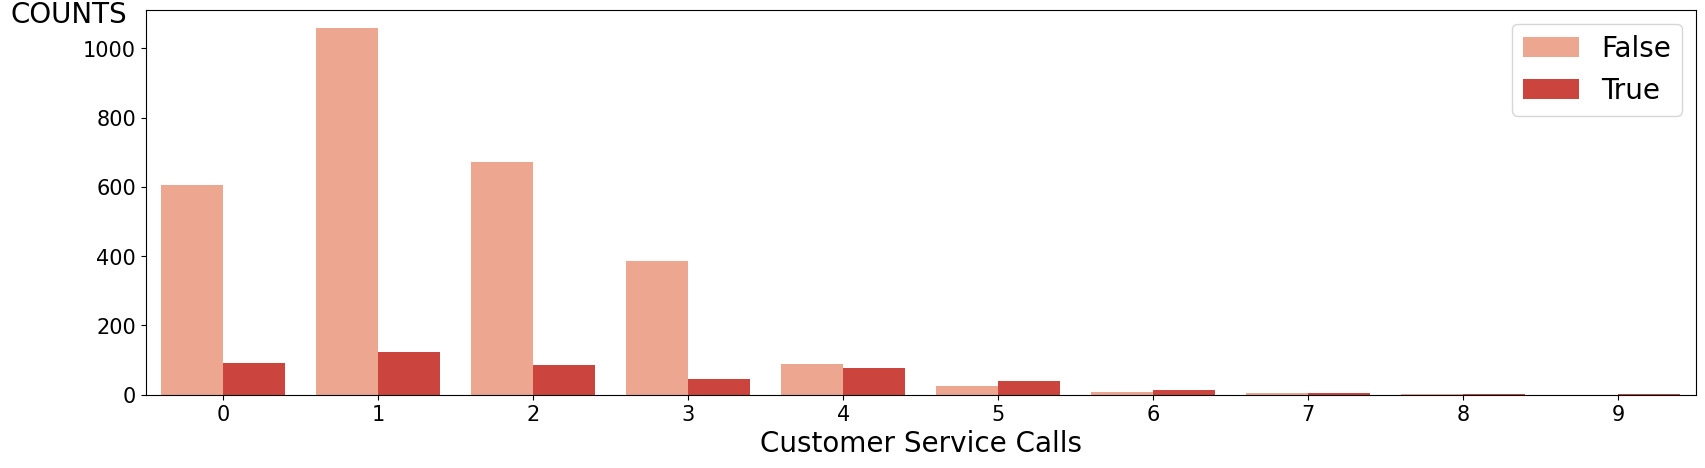

In [29]:
fig, axz = plt.subplots(figsize=(20,5))

axz = sns.countplot(x='customer service calls', hue='churn', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('Customer Service Calls', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)

## What can we conclude from this?

Nos clientes com 1 chamada a proporção dos que ficam é maior. O apoio a cliente funciona!
Clientes com mais de 3 chamadas ...

# Pre-process

In [32]:
####
df=df.drop(['phone number'],axis=1)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

colunas= ['state', 'international plan', 'voice mail plan','churn']
df[colunas]=enc.fit_transform(df[colunas])
enc.categories_

In [34]:
####
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

columns2Encode = ['state', 'international plan', 'voice mail plan','churn']
for c in columns2Encode:
    df[c]=enc.fit_transform(df[c])
    print(enc.classes_)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
['no' 'yes']
['no' 'yes']
[False  True]


In [35]:
####
columns2drop = ['total day charge','total eve charge','total night charge','total intl charge']
df=df.drop(columns2drop,axis=1)
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0


## SPLIT

In [37]:
####
y=df['churn']
X=df.drop(['churn'],axis=1)

In [38]:
####
# ATT: stratify=y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=24,
                                                    stratify=y)

In [39]:
y_train.sum()/y_train.count()

0.1448579431772709

In [40]:
y_test.sum()/y_test.count()

0.145083932853717

# Train

In [42]:
####
from datetime import datetime

In [43]:
####
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [44]:
# Consultar PerformanceMetrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score

In [45]:
results_df=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1-score'])

def evaluate(reais, previstos):
    _accuracy = accuracy_score(reais, previstos)
    _precision = precision_score(reais, previstos)
    _recall = recall_score(reais, previstos)
    _f1 = f1_score(reais, previstos, average='weighted')
    return round(_accuracy,2), round(_precision,2), round(_recall,2), round(_f1,5)

def print_evaluate(model, reais, previstos):  
    accuracy, precision, recall, f1 = evaluate(reais, previstos)
    print('__________________________________')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('__________________________________')
    results=np.array([model,accuracy, precision, recall, f1])
    results_df.loc[len(results_df)+1]=results
    


In [46]:
from time import time

def grid_search(model, params, _X, _y):
    GSCV = GridSearchCV(estimator=model
                    ,param_grid=params
                    ,cv=5
                    ,n_jobs = -1
                    ,verbose = 1)
    start = time()
    GSCV.fit(_X,_y)
    grid_time = time() - start
    print("Grid time:", grid_time)
    print(GSCV.best_params_) 
    return GSCV.best_params_

### A - SVM 

In [48]:
from sklearn.svm import SVC
svc  = SVC(C=0.6, kernel='linear', random_state=24)

svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)


In [49]:
print("f1 score: ",f1_score(y_test, svc_pred, average="weighted"))

print("\nClassification_report\n", classification_report (y_test, svc_pred, digits=2))


f1 score:  0.7909361946957608

Classification_report
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       713
           1       1.00      0.01      0.02       121

    accuracy                           0.86       834
   macro avg       0.93      0.50      0.47       834
weighted avg       0.88      0.86      0.79       834



In [50]:
print_evaluate("SVC", y_test, svc_pred)

__________________________________
Accuracy: 0.86
Precision: 1.0
Recall: 0.01
F1: 0.79094
__________________________________


<Axes: >

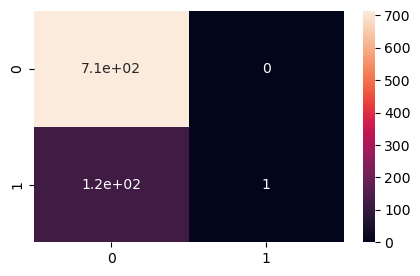

In [51]:

cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

## ir ao anaconda prompt

## pip3 install xgboost

In [53]:
####
import xgboost as xgb


In [54]:
eval_sets = [
    (X_train, y_train),
#    (X_test, y_test)
]

In [55]:
xgb_rf_c = xgb.XGBRFClassifier(random_state=24)

In [56]:
####
xgb_rf_c = xgb.XGBRFClassifier(
                        # silent=False, 
#                          scale_pos_weight=1,
#                          learning_rate=0.01,  
#                          colsample_bytree = 0.99,
#                          subsample = 0.8,
#                          objective='binary:logistic', 
#                          n_estimators=100, 
#                          reg_alpha = 0.003,
#                          max_depth=10, 
#                          gamma=10,
#                          min_child_weight = 1,
#                          eval_metric = ["error", "logloss"],
                          random_state=24
                         )
xgb_rf_c.fit(X_train
              , y_train)

xgb_pred=xgb_rf_c.predict(X_test)

print_evaluate("XGB", y_test, xgb_pred)

__________________________________
Accuracy: 0.93
Precision: 0.76
Recall: 0.74
F1: 0.92755
__________________________________


In [57]:
print("f1 score: ",f1_score(y_test, xgb_pred, average="weighted"))

print("\nClassification_report\n", classification_report (y_test, xgb_pred, digits=2, zero_division=True))

f1 score:  0.9275536143923786

Classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       713
           1       0.76      0.74      0.75       121

    accuracy                           0.93       834
   macro avg       0.86      0.85      0.85       834
weighted avg       0.93      0.93      0.93       834



In [58]:
xgb_rf_c.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 24,
 'reg_alpha': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

<Axes: >

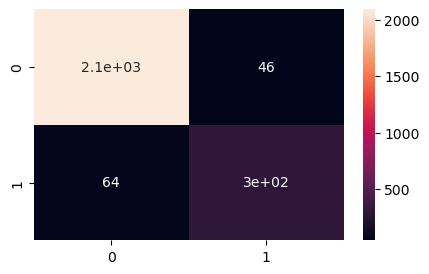

In [59]:
# Confusion Matrix with training data
train_predictions = xgb_rf_c.predict(X_train)#[:, 1]
cm = confusion_matrix(y_train, train_predictions)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

<Axes: >

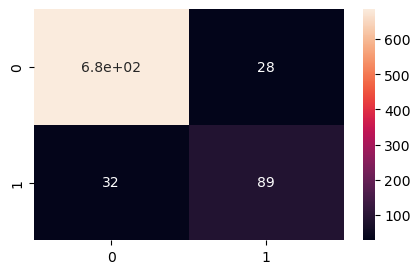

In [60]:
# Confusion Matrix with test data
test_predictions = xgb_rf_c.predict(X_test)#[:, 1]
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

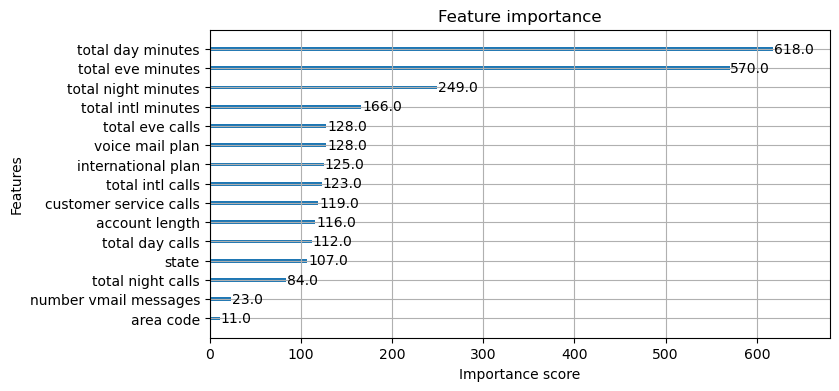

In [61]:
from xgboost import plot_importance

#plot_importance(xgb_rf_c)

fig, ax = plt.subplots(1,1,figsize=(8,4))
plot_importance(booster=xgb_rf_c, ax=ax)


## Search for XGBoost's best hyperparameters 

In [63]:
####
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [64]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, 
                        param_grid = parameters, 
                        scoring = 'roc_auc', 
                        n_jobs=-1, 
                        cv=folds, #skf.split(X,y), 
                        verbose=3
                       )
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_estimator_.get_params()

In [65]:
# A parameter grid for XGBoost
params_xgb = {
        #'min_child_weight': [1, 5],
        'gamma': [7,10, 15],
        'n_estimators':[100, 150,200],
        #'subsample': [0.4, 0.8, 1.0],
        'colsample_bytree': [ 0.8,1],
        'max_depth': [5, 10,15]
        }

params_xgb = {
        'min_child_weight': [1, 5],
        'gamma': [1, 15, 10],
        'colsample_bytree': [0.99, 0.5, 1.0],
        'max_depth': [5, 10, 15],
        'n_estimators': [100, 500, 1000]
        }

folds = 2
#param_comb = 5

#skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

####
grid = GridSearchCV(estimator=xgb_rf_c, param_grid=params_xgb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3 )
grid.fit(X_train, y_train)

#bestScore, bestParams = grid (xgb_rf_c, params)
#print(bestScore)
#print(bestParams)


best_params=grid.best_params_

grid.best_score_, grid.best_estimator_.get_params()

In [69]:
####
# A parameter grid for XGBoost
#params = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5, 1, 1.5, 2, 5, 10, 15],
#        'subsample': [0.4, 0.8, 1.0],
#       'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [3, 5, 10, 15, 20]
#        'n_samples': [100, 500, 1000]
#        }

#folds = 5
#param_comb = 5

#skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [70]:
#xgb_classifier = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=0)

In [71]:
####
#grid = GridSearchCV(estimator=xgb_rf_c, param_grid=params, scoring='roc_auc', n_jobs=1, cv=skf.split(X_train,y_train), verbose=3 )
#grid = GridSearchCV(estimator=xgb_rf_c, param_grid=params, scoring='roc_auc', n_jobs=1, cv=skf.split(X, y), verbose=3 )

#bestScore, bestParams = grid (xgb_rf_c, params)
#print(bestScore)
#print(bestParams)


In [72]:
model=xgb.XGBRFClassifier()
best_params=grid_search(model, params_xgb, X_train, y_train)

# Create a new XGBoost Classifier
xgb_2=xgb.XGBRFClassifier(
    min_child_weight  = best_params['min_child_weight'],
    gamma             = best_params['gamma'],
    colsample_bytree  = best_params['colsample_bytree'],
    n_estimators      = best_params['n_estimators'],
    max_depth         = best_params['max_depth']
)


# Train it
xgb_2.fit(X_train, y_train)

# Make predictions on the test dataset
xgb_2_pred = xgb_2.predict(X_test)

print_evaluate("XGB optimized", y_test, xgb_2_pred)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Grid time: 1092.9053049087524
{'colsample_bytree': 0.99, 'gamma': 1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}
__________________________________
Accuracy: 0.93
Precision: 0.76
Recall: 0.72
F1: 0.92595
__________________________________


####
#Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable

grid.fit(X_train, y_train)
#grid.fit(X_train, y_train)

timer(start_time) # timing ends here for "start_time" variable

####
#print('\n All results:')
#print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
#results.to_csv('xgb-grid-search-results-01.csv', index=False)

#y_test = grid.best_estimator_.predict_proba(X_test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

#Create a new XGBoost Classifier
xgb_2=xgb.XGBRFClassifier(
    min_child_weight           = best_params['min_child_weight'],
    gamma  = best_params['gamma'],
    colsample_bytree         = best_params['colsample_bytree'],
    n_estimators      = best_params['n_estimators'],
    max_depth         = best_params['max_depth']
)


#Train it
xgb_2.fit(X_train,y_train)

#Make predictions on the test dataset
xgb_2_pred = xgb_2.predict(X_test)

print_evaluate("XGB optimized", y_test, xgb_2_pred)

<Axes: >

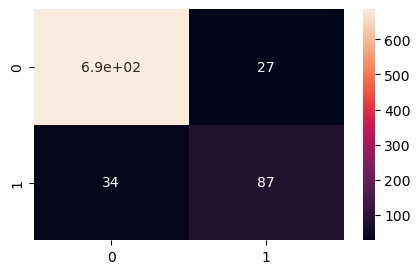

In [76]:
# Confusion Matrix with test data
cm = confusion_matrix(y_test, xgb_2_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

# Resampling

## pip3 install imblearn
!pip install imlearn

## Oversampling

In [80]:
from imblearn.over_sampling import SMOTE


#### estrategia smote base (oversampling dos dados treino em 1:1)

In [82]:
from imblearn.over_sampling import SMOTE


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))



Before OverSampling, counts of label '1': 362
Before OverSampling, counts of label '0': 2137 

After OverSampling, the shape of train_X: (4274, 15)
After OverSampling, the shape of train_y: (4274,) 

After OverSampling, counts of label '1': 2137
After OverSampling, counts of label '0': 2137


In [83]:
####
# Create a new XGBoost Classifier
xgb_3=xgb.XGBRFClassifier(
    min_child_weight  = best_params['min_child_weight'],
    gamma             = best_params['gamma'],
    colsample_bytree  = best_params['colsample_bytree'],
    n_estimators      = best_params['n_estimators'],
    max_depth         = best_params['max_depth']
)

# Train it
xgb_3.fit( X_train_res, y_train_res, verbose = False
             )

# Make predictions on the test dataset
xgb_3_pred = xgb_3.predict(X_test)

print_evaluate("XGB optimized with SMOTE", y_test, xgb_3_pred)

__________________________________
Accuracy: 0.92
Precision: 0.71
Recall: 0.77
F1: 0.92215
__________________________________


<Axes: >

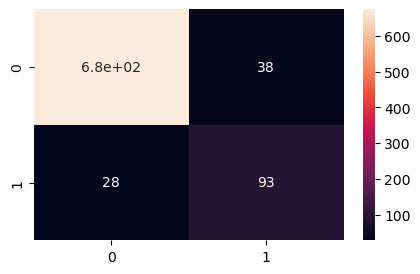

In [84]:
# Confusion Matrix with test data
cm = confusion_matrix(y_test, xgb_3_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

In [ ]:
model=xgb.XGBRFClassifier()
best_params=grid_search(model, params_xgb, X_train_res, y_train_res)

# Create a new XGBoost Classifier
xgb_4=xgb.XGBRFClassifier(
    min_child_weight  = best_params['min_child_weight'],
    gamma             = best_params['gamma'],
    colsample_bytree  = best_params['colsample_bytree'],
    n_estimators      = best_params['n_estimators'],
    max_depth         = best_params['max_depth']
)


# Train it
xgb_4.fit(X_train_res, y_train_res)

# Make predictions on the test dataset
xgb_4_pred = xgb_4.predict(X_test)

print_evaluate("XGB optimized", y_test, xgb_4_pred)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
# Confusion Matrix with test data
cm = confusion_matrix(y_test, xgb_4_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

#### estratega de smote com limite

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2,sampling_strategy={1: 800})
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))



In [ ]:
model=xgb.XGBRFClassifier()
best_params=grid_search(model, params_xgb, X_train_res, y_train_res)

# Create a new XGBoost Classifier
xgb_5=xgb.XGBRFClassifier(
    min_child_weight  = best_params['min_child_weight'],
    gamma             = best_params['gamma'],
    colsample_bytree  = best_params['colsample_bytree'],
    n_estimators      = best_params['n_estimators'],
    max_depth         = best_params['max_depth']
)


# Train it
xgb_5.fit(X_train_res, y_train_res)

# Make predictions on the test dataset
xgb_5_pred = xgb_5.predict(X_test)

print_evaluate("XGB optimized with SMOTE w/ limits", y_test, xgb_5_pred)

In [ ]:
# Confusion Matrix with test data
cm = confusion_matrix(y_test, xgb_5_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


In [ ]:

# define undersample strategy
#undersample = RandomUnderSampler(sampling_strategy="majority")
undersample = RandomUnderSampler(sampling_strategy=0.2, random_state=33)

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("X:", X_train.shape, "-->", X_train_under.shape)
print("y:", y_train.shape, "-->",y_train_under.shape)

In [ ]:
model=xgb.XGBRFClassifier()
best_params=grid_search(model, params_xgb, X_train_under, y_train_under)

# Create a new XGBoost Classifier
xgb_6=xgb.XGBRFClassifier(
    min_child_weight  = best_params['min_child_weight'],
    gamma             = best_params['gamma'],
    colsample_bytree  = best_params['colsample_bytree'],
    n_estimators      = best_params['n_estimators'],
    max_depth         = best_params['max_depth']
)


# Train it
xgb_6.fit(X_train_under, y_train_under)

# Make predictions on the test dataset
xgb_6_pred = xgb_6.predict(X_test)

print_evaluate("XGB optimized with SMOTE w/ limits and Under", y_test, xgb_6_pred)

In [ ]:
# Confusion Matrix with test data
cm = confusion_matrix(y_test, xgb_6_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)

In [ ]:
results_df

In [ ]:
# testar diferentes valores para sampling_strategy

results = pd.DataFrame()
for i in range(20,51,5):
    #print (i/100)
    undersample = RandomUnderSampler(sampling_strategy=i/100, random_state=33)
    X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
    xgb_rf_c.fit(X_train_under,y_train_under)
    ac=xgb_rf_c.score(X_test, y_test)
    
    r=pd.DataFrame({"a":i,"b":ac}, index=[0])
    results=pd.concat([results,r]).reset_index(drop=True)
results

# manipulação de dataframes
# https://sparkbyexamples.com/pandas/pandas-add-row-to-dataframe/

# Evaluating

In [ ]:
y_pred=xgb_rf_c.predict(X_test)

In [ ]:
# F1_score(true_labels, predicted_labels, average="wheighted")

print(f1_score(y_test, y_pred, average="weighted"))


In [ ]:
print("f1 score: ",f1_score(y_test, y_pred, average="weighted"))

# Print(classification_report (true_labels, predicted_labels, digits=4)
print("\nClassification_report\n", classification_report (y_test, y_pred, digits=2))

In [ ]:
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:
model = model_report(xgc,x_train,x_test,y_train,y_test, "XGBoost Classifier")

In [ ]:
model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")